<b>Weather control model - RandomForest, test</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
# load the data
df = pd.read_csv("digitraffic_weather_balanced.csv")

In [3]:
df.head()

,dew_point,avg_wind,humidity,rain,rain_sum,snow_depth,rain_amount,snow_amount,ice_measure,friction,ice_frequency,mean_temperature,condition
0,-12.700000,5.500000,47.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.820000,487.000000,7.000000,Normal
1,-8.403115,2.460407,59.626775,3.017363,0.000000,6.094455,0.00,0.316054,0.353955,0.569816,648.000000,-34.593139,Ice
2,-3.200000,2.100000,96.000000,4.000000,2.100000,0.000000,0.00,0.340000,0.110000,0.380000,112.000000,7.100000,Snow
3,0.400000,0.900000,98.000000,0.000000,0.700000,0.000000,0.02,0.000000,0.000000,0.820000,465.000000,-0.021505,Rain
4,-5.867660,1.439352,64.113793,0.000000,1.693064,0.000000,0.00,0.155041,0.509244,0.619030,62.130165,-16.647309,Ice


<b>Convert everything to numeric format, and drop useless columns</b>

In [4]:
df.describe()

,dew_point,avg_wind,humidity,rain,rain_sum,snow_depth,rain_amount,snow_amount,ice_measure,friction,ice_frequency,mean_temperature
count,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000
mean,-3.827511,2.701996,75.707211,1.338677,1.368655,1.484989,0.112600,0.063836,0.053263,0.717029,239.675504,1.511737
std,7.744731,1.862333,21.738799,1.862569,2.285105,3.815704,0.327113,0.164342,0.128028,0.169249,159.839091,17.983132
min,-28.300000,0.100000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,12.000000,-126.000000
25%,-8.800000,1.200000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000,112.000000,-2.482558
50%,-3.200000,2.400000,81.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.810000,115.000000,0.100000
75%,3.150000,3.800000,95.000000,4.000000,1.900000,1.000000,0.150000,0.022316,0.020000,0.820000,410.000000,7.844952
max,9.000000,14.800000,100.000000,6.000000,17.200000,42.000000,11.420000,1.740000,1.235675,0.820000,648.000000,121.000000


In [5]:
# our dataset is not quite balanced regarding target variable
# this will probably cause some problems with the logistic regression
df['condition'].value_counts()

condition
Normal    600
Rain      600
Snow      512
Ice       415
Name: count, dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()


36

In [7]:
df = df.drop_duplicates()

In [8]:
# check for missing values
df.isna().sum()

dew_point           0
avg_wind            0
humidity            0
rain                0
rain_sum            0
snow_depth          0
rain_amount         0
snow_amount         0
ice_measure         0
friction            0
ice_frequency       0
mean_temperature    0
condition           0
dtype: int64

<b>Convert data to X/y and scale the values</b>

In [9]:
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('condition', axis=1)
y = df['condition']

In [10]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

<b>Create the logistic regression and fit the data</b>

In [12]:
# during lectures, we got a 96% accuracy once with these parameters
# model = make_pipeline(StandardScaler(), RandomForestClassifier(criterion="entropy", class_weight="balanced", ccp_alpha=0.05))
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

<b>Classification error metrics</b>

In [13]:
predictions = model.predict(X_test)

In [14]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

         Ice       0.97      0.96      0.97       139
      Normal       0.87      0.93      0.90       173
        Rain       0.92      0.87      0.89       175
        Snow       0.96      0.95      0.96       141

    accuracy                           0.93       628
   macro avg       0.93      0.93      0.93       628
weighted avg       0.93      0.93      0.93       628


Model overall accuracy: 92.52%


<Axes: >

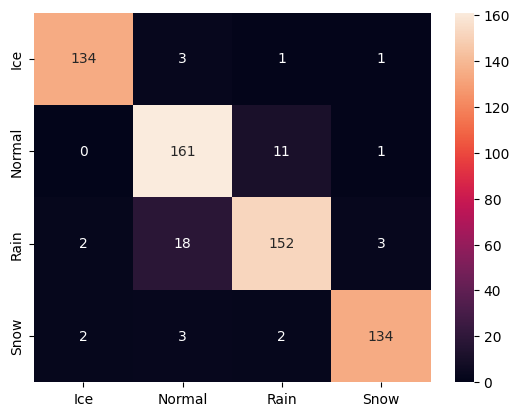

In [17]:
#print(confusion_matrix(y_test, predictions))

# if you want a more graphical version of this, try:
labels = np.unique(df['condition'])
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [20]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
#roc_auc_score(y_test.values, model.predict(X_test)[:, 1], multi_class="ovr")
roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.9886065020044417

<b>Test with some new data</b>

In [21]:
df.columns

Index(['dew_point', 'avg_wind', 'humidity', 'rain', 'rain_sum', 'snow_depth',
       'rain_amount', 'snow_amount', 'ice_measure', 'friction',
       'ice_frequency', 'mean_temperature', 'condition'],
      dtype='object')

In [22]:
df.iloc[0]

dew_point            -12.7
avg_wind               5.5
humidity              47.0
rain                   0.0
rain_sum               0.0
snow_depth             0.0
rain_amount            0.0
snow_amount            0.0
ice_measure            0.0
friction              0.82
ice_frequency        487.0
mean_temperature       7.0
condition           Normal
Name: 0, dtype: object

In [24]:
# let's try a new value
tester_row = {
    'dew_point': -12.7, 
    'avg_wind': 5.5, 
    'humidity': 47.0, 
    'rain': 0, 
    'rain_sum': 0, 
    'snow_depth': 0,
    'rain_amount': 0, 
    'snow_amount': 0, 
    'ice_measure': 0,
    'friction': 0.82,
    'ice_frequency': 487.0,
    'mean_temperature': 7
}

# create a pandas DataFrame
tester_row = pd.DataFrame([tester_row])

# probabilities
print("All probabilities by category:")
print(labels)
print(model.predict_proba(tester_row))
print()


print("Current weather:")
result = model.predict(tester_row)[0]
print(result)
print("-------------------")

All probabilities by category:
['Ice' 'Normal' 'Rain' 'Snow']
[[0.   0.98 0.02 0.  ]]

Current weather:
Normal
-------------------
